<a href="https://colab.research.google.com/github/SophistryDude/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3/Nick_M's_Copy_of_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv

--2020-08-12 21:33:19--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv.1’

bootcampers.csv.1   100%[===================>]   2.38M  12.3MB/s    in 0.2s    

2020-08-12 21:33:19 (12.3 MB/s) - ‘bootcampers.csv.1’ saved [2499384/2499384]



In [ ]:
# Loading up libraries, setting column headers, creating my main dataframe (df) and checking what the table looks like. I set the header = 0 so I could convert the columns into int values if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

column_headers = ['Student','Employment','UndergradMajor','DevType','YearsCoding','YearsCodingProf','ConvertedSalary','EducationTypes','SelfTaughtTypes','TimeAfterBootcamp','LanguageWorkedWith','Gender','Age','RaceEthnicity']

df = pd.read_csv('bootcampers.csv', names=column_headers, header=0)
print(df.shape)
df.head()

(2761, 14)


,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
df.dtypes

Student                object
Employment             object
UndergradMajor         object
DevType                object
YearsCoding            object
YearsCodingProf        object
ConvertedSalary       float64
EducationTypes         object
SelfTaughtTypes        object
TimeAfterBootcamp      object
LanguageWorkedWith     object
Gender                 object
Age                    object
RaceEthnicity          object
dtype: object

In [ ]:
# I needed to change the salaries in ConvertedSalary from float to int
df['ConvertedSalary'] = df['ConvertedSalary'].astype(float).astype(int)

In [ ]:
sample1 = df.sample(20, random_state=42)
sample2 = df.sample(200, random_state=42)



**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
sample1['ConvertedSalary'].mean()

55752.2

In [ ]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

The larger the sample size the less weight each individual input is worth. So theoretically you want to have your sample files approaching infinity. Here a sample size of 200 is going to be significantly more reliable than a sample size of 20. 

A non-technical audience would probably understand that more data means more reliable, and therefor conclude that the larger sample size is better. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Just the point estimate can't tell you how much sampling eror there is, but in conjunction with multiple point estimates we can understand the precision of our data, and that reduces sampling error. 

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



The use of visual aid (graphs) in most cases is going to be the most helpful tool to bridge the gap of our technical analysis, and the non-technical readers comprehension. 

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [78]:
# To calculate our Confidence Interval we need to set it as a variable using the def function
def confidence_interval(sample, confidence_level=.95):
  sample=np.array(sample)
  x_bar = np.mean(sample)
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)

In [79]:
# To calculate MOE we need to find the standard error
def confidence_interval(sample, confidence_level=.95):
  sample=np.array(sample)
  x_bar = np.mean(sample)
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)


  std_err = s / np.sqrt(n)
  # We use st_err to define MOE
  moe = t * std_err

In [80]:
# Lastly we need to finish our confidence_interval by setting the bounds and running a return function
def confidence_interval(sample, confidence_level=.95):
  sample=np.array(sample)
  x_bar = np.mean(sample)
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)
  std_err = s / np.sqrt(n)
  moe = t * std_err


  lower_bound = x_bar - moe
  upper_bound = x_bar + moe
  return (lower_bound, x_bar, upper_bound, moe)


In [83]:
# Let's make sure there are no Nan's to ruin our day
Clean_sample1 = sample1['ConvertedSalary'].dropna()
sample1_ci = confidence_interval(Clean_sample1)
sample1_ci

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [85]:
Clean_sample2 = sample2['ConvertedSalary'].dropna()
sample2_ci = confidence_interval(Clean_sample2)
sample2_ci

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

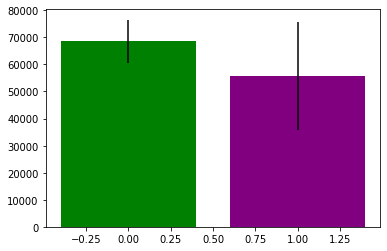

In [86]:
# Now that we have some numbers, let's plot them for our hypothetical non-technical staff.
plt.bar(x=0, height=sample2_ci[1], yerr=sample2_ci[3], color='green')
plt.bar(x=1, height=sample1_ci[1], yerr=sample1_ci[3], color='purple')
plt.show()

**2) Which confidence interval is wider and why?**

The confidence interval of the second sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [87]:
print(sample2_ci)

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)


In [88]:
print(sample1_ci)

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)


The margin of error notes the difference between the lower/upper bar and the mean. The wider the margin of error, the less precise the data is. 

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

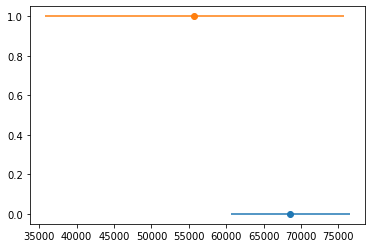

In [91]:
plt.errorbar(x=sample2_ci[1], y=0, xerr=sample2_ci[3], fmt='o')
plt.errorbar(x=sample1_ci[1], y=1, xerr=sample1_ci[3], fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

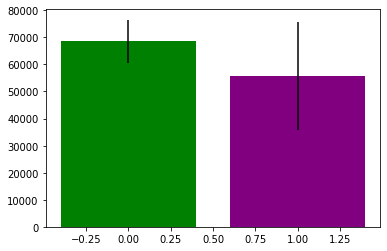

In [90]:
plt.bar(x=0, height=sample2_ci[1], yerr=sample2_ci[3], color='green')
plt.bar(x=1, height=sample1_ci[1], yerr=sample1_ci[3], color='purple')
plt.show()

## Part 4 - Check for Understanding









```
# This is formatted as code
```

**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [97]:
total_ci = [sample1_ci, sample2_ci]
df2 = pd.DataFrame(total_ci)
df2.columns = ['lower', 'mean', 'upper', 'moe']
df2.head()

,lower,mean,upper,moe
0,35805.103096,55752.200,75699.296904,19947.096904
1,60593.058804,68551.255,76509.451196,7958.196196


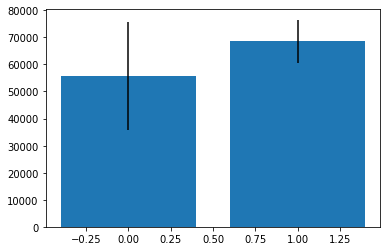

In [99]:


plt.bar(x=range(0, df2.shape[0]), height=df2['mean'], yerr=df2['moe'])
plt.show()

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

precision is the grouping of the estimates. It's an assessment of how consistent the predictions made are. 

Accuracy is how close to the true population value your data is. 

Precision differs from accuracy because it's not necessarily tied to the true population value. You can have a precise sample estimate that is not accurate, say one centered 1 standard deviation off from the true pop value. 


**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A 95% confidence interval means that if you run a sample estimate, 95% (or 19/20) of the time that sample estimate will contain the true population mean within the expected range. 

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.